# Tutorial for Stochastic Gradient Descent (SGD)

under construction



In this Notebook we introduce the SGD algorithm. We use a linear model

$$
y = a \cdot x + b
$$

to approximate a given set of data points. The goal is to find the optimal model parameters **a** and **b**.

## Imports

In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display, HTML
import ipywidgets as widgets

In [3]:
import numpy as np
from numpy.random import default_rng

from matplotlib import pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from matplotlib import cm
from matplotlib.transforms import Bbox

# The data
We have N=5 data points (x,y) given as two vectors X and Y.

In [4]:

Data_X = np.array([-4,   -2,   1,  2.5,  3.9])
Data_Y = np.array([-0.9, -0.4, 1.7, 1.5,  2.05])


Text(0.5, 1.0, 'Data')

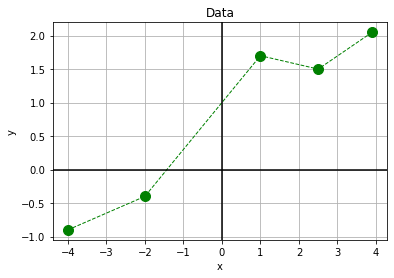

In [5]:
plt.plot(Data_X, Data_Y, '--og', linewidth = 1, markersize=10)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

# The model

The goal of the model is to take a value x and predict $\hat{y}$. We use the 'hat' symbol to denote an estimated (predicted) value:

$$
\hat{y} = a \cdot x + b
$$


In Python, we can write this function as a lambda expression and store it in a variable:

In [6]:
lin_model = lambda x, a, b : a*x+b

# evaluate the model:
y = lin_model(-4, 2, 0.5)
print(y)

#We can pass a vector (array) to the lambda expression 
Y = lin_model(Data_X, 2, 0.5)
print(Y)

-7.5
[-7.5 -3.5  2.5  5.5  8.3]


In [7]:
# for (interactive) visualization we need to wrap the model and the MSE calculation
# into a more complicated function. 
# You can skip this code.


def plt_linear_model(a = 0.1, b = 0.2, X = Data_X, Y = Data_Y, show_error_squares=False):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes()
    
    y = lin_model(X, a, b)

    if show_error_squares:
        ax.plot(X, y, '-xb', linewidth=2)
    else:
        ax.plot(X, y, '-b', linewidth=2)
        
    ax.plot(X, Y, '--og', linewidth=1)
    ax.axhline(y=0, color='tab:gray')
    ax.axvline(x=0, color='tab:gray')
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    N = len(Data_X)

    if show_error_squares:
        Esum = 0.
        for i in range(N):
            xi = X[i]
            yi = Y[i]
            y_hat = lin_model(xi, a, b)
            err = yi-y_hat # difference between data and model estimate
            Esum += (err**2)/2.
            if abs(err) > 0.01 :
                sq = plt.Rectangle( (xi, yi), abs(err), -err , alpha=0.2, color='r')
                ax.add_patch(sq)
                ax.plot([xi, xi], [yi, y_hat], linewidth=3, color='r')
        ax.set_title("Linear Model Params: a={:.3}, b={:.3}\nMean squared error (MSE) = {:.4f}".format(a, b, Esum/N))
    else:
        ax.set_title("Linear Model Params: a={:.3}, b={:.3}".format(a, b))
    return a, b

(0.1, 0.2)

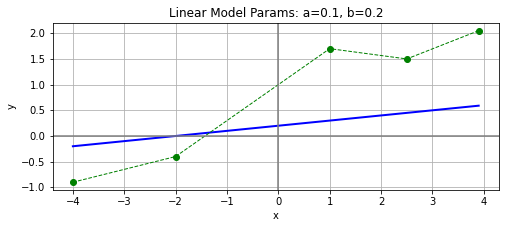

In [8]:
plt_linear_model(a = 0.1, b = 0.2, X = Data_X, Y = Data_Y)

(0.7, 0.4)

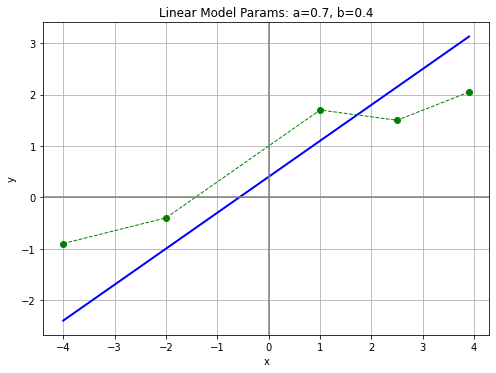

In [9]:
plt_linear_model(a = 0.7, b = 0.4, X = Data_X, Y = Data_Y)

# Interactive, manual fitting

Use the sliders to find the line which best approximates the given datapoints.

In [10]:
w = interact(plt_linear_model, 
             a=widgets.FloatSlider(min=-1.0, max=1.0, step=0.02, value=-0.1),
             b=widgets.FloatSlider(min=-2.0, max=2.0, step=0.02, value=+1.5),
             X=fixed(Data_X),
             Y=fixed(Data_Y),
             show_error_squares = fixed(False))
display(w)

interactive(children=(FloatSlider(value=-0.1, description='a', max=1.0, min=-1.0, step=0.02), FloatSlider(valu…

<function __main__.plt_linear_model(a=0.1, b=0.2, X=array([-4. , -2. ,  1. ,  2.5,  3.9]), Y=array([-0.9 , -0.4 ,  1.7 ,  1.5 ,  2.05]), show_error_squares=False)>

# Evaluating your fit

How good does your linear model approximate the data? To answer this question, we need a way to measure the "goodness" of the fit. A common quantity to look at, are the squared errors:

For each data point $(x_i, y_i)$ we compare the given value $y_i$ with the value $\hat{y}_i$ predicted by the model. The total error is calculated as the sum (over N given data points) of the squared differences, divided by N. For reason that become clear later, the error is divided by 2.

$$
\begin{align}
\hat{y}_i &= a \cdot x_i + b \\
e_i &= y_i - \hat{y}_i   \\
E &= \frac{1}{2N}\sum_{i=1}^N e_i^2 \\
&= \frac{1}{2N}\sum_{i=1}^N (\hat{y} - (a \cdot x_i + b) )^2
\end{align}
$$

This error is known as the **Mean Squared Error (MSE)** (divided by 2). We can visualize the squared errors $e_i^2$ for different model parameters and gain intuition for the error function:



(0.1, 0.4)

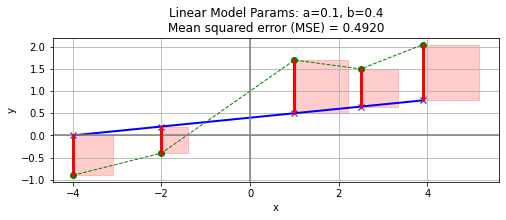

In [11]:
# example 1: 
plt_linear_model(a=0.1, b=0.4, X=Data_X, Y=Data_Y,show_error_squares=True)

(0.5, 1.0)

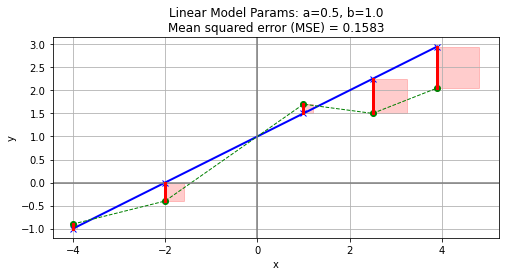

In [12]:
# example 2: a=+0.5, b=1.0
plt_linear_model(+0.5, 1.0, Data_X, Data_Y, True)

In [13]:
# Example 3: Using the interactive widget, find the optimal fit

w = interact(plt_linear_model, 
             a=widgets.FloatSlider(min=-0.5, max=0.8, step=0.02, value=0.1),
             b=widgets.FloatSlider(min=-1.0, max=1.0, step=0.02, value=0.5),
             X=fixed(Data_X),
             Y=fixed(Data_Y),
             show_error_squares = fixed(True))
display(w)

interactive(children=(FloatSlider(value=0.1, description='a', max=0.8, min=-0.5, step=0.02), FloatSlider(value…

<function __main__.plt_linear_model(a=0.1, b=0.2, X=array([-4. , -2. ,  1. ,  2.5,  3.9]), Y=array([-0.9 , -0.4 ,  1.7 ,  1.5 ,  2.05]), show_error_squares=False)>

# The Error is a function of the data and the model parameters
You have seen that the error quantifies the mismatch between the data (given as vectors X and Y) and the model. Using a linear model with two parameters, a and b, the error E is a function of four parameters: $E=f(X, Y, a, b)$.
But as the data is given (fixed), the only *variables* are the model parameters (here a and b).

For simple two-parameter models, we can visualize the error at each location (a,b) of the parameter space:


In [14]:
# define the error function. It depends on the data X, Y, and on the model parameters a, b.
def sq_err(X, Y, a, b):
    N = len(X)
    Y_hat = lin_model(X, a, b)
    err = np.subtract(Y,Y_hat)
    squard_err = np.square(err)
    sum_of_squared_errors = np.sum(squard_err)
    return sum_of_squared_errors/(2.0*N)

In [15]:
# Example: 
# Evaluate the error function for the given data X, Y and 
# some point (a=0.5, b=1.0) in the parameter space
sq_err(Data_X, Data_Y, 0.5, 1.0)

0.15825000000000006

In [16]:
# visualize the MSE. Provide the given Data_X, _Y as default values

# To plot the error function, we use a meshgrid. This is efficient, but the code is a bit harder to read.
# It contains some technicalities which are not relevant for the SGD algorithm

def plot_error(X=Data_X, Y=Data_Y, 
               a_min = 0.2, a_max=0.7, 
               b_min=0.3, b_max = 1., nr_mesh_points_ab=30,
               fig = None, ax = None):
    # define the region of interest. 
    A = np.linspace(a_min, a_max, nr_mesh_points_ab)
    B = np.linspace(b_min, b_max, nr_mesh_points_ab)
    aa, bb = np.meshgrid(A, B)
    
    # we wrap the (four-param) error function into a two-parameter expression and inject the Data.
    # A vectorized form of this expression can then be called directly with the meshgrid coordinates aa, bb
    vect_sq_err=np.vectorize(lambda a, b: sq_err(X, Y, a,b))
    E = vect_sq_err(aa, bb)


    if fig is None:
        fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot()

    h = ax.contourf(A, B, E, levels=20, cmap=cm.coolwarm) # cmap="YlGnBu"
    fig.colorbar(h)

    # add contour lines. For better readability, transform values to get equidistant lines.
    mi = np.min(E)
    ma = np.max(E)
    r = ma-mi
    ax.contour(A, B, np.sqrt((E-mi+1e-6)/r), levels=20, colors = 'k', linewidths = 0.2) # cmap="YlGnBu"

    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title("MSE as a function of a and b")
    ax.set_aspect('equal')

       
    return fig, ax


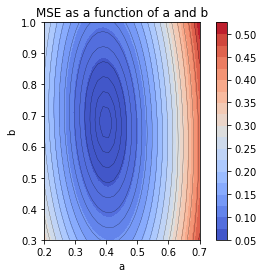

In [17]:
# For given Data, plot the error as a function of a and b.
# Note: the _ simply tells Python that we do not need the return values.
_ = plot_error(X=Data_X, Y=Data_Y)

### Exercise:
We can now use this 2D plot to read out the value of the error for any model parameters (a,b).

Q1: For each of the 3 following linear models, estimate the Mean Squared Error

linear model #1: $y = 0.7x+1.0$

linear model #2: $y = 0.5x+0.8$

linear model #3: $y = 0.3x+0.4$

Q2: Now use the function *sq_err()* to calculate the sum of squared errors. Compare with your estimates.

Q3: Can we find a linear function for which the error goes to zero?

Q4: Look at the implementation of the function *plot_error()*. The 2D plot was created by evaluating the function *sq_err* at all points of a grid. How many times was the error calculated, that is, how many points are on the grid?

In [18]:
#sq_err(... set parameters )

# Gradient Descent

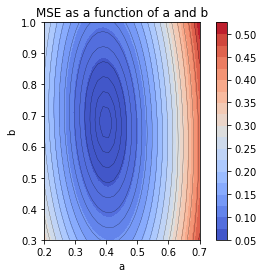

In [19]:
_ = plot_error(X=Data_X, Y=Data_Y)

If we have access to this error plot, it is easy to estimate the best fitting parameters [a,b]: we simply pick the location [a,b] with the smallest error.

But computing this error-landscape is expensive! Even for the simple example here, the error was calculated several hundred times. Furthermore, it was necessary to predefine the search-area and a resolution for the grid.

By looking at the figure, we can identify a more efficient strategy of finding the location with the lowest error: 

**At any location [a,b] we look at the error-gradient in the neighbourhood of [a,b] and move a (small) step in the direction where the error shrinks the most.
By repeating this procedure, we will eventually arrive at the location where the error is smallest.**

This iterative procedure is, informally, the **Gradient Descent** algorithm. The method is efficient, because we do not perform a calculation (of the *error E*) at many (unnecessary) location. Instead we move along a trajectory which includes fewer points. At each point of the trajectory we evaluate the *gradient* of the error function.



In [20]:
# the following two functions are used below. For now you can skip them.

# implement a single update step.
def update_ab(a0, da, b0, db, scaling = 1.):
    a1 = a0 + scaling * da
    b1 = b0 + scaling * db
    return a1, b1

# A helper to add a vector to the Error landscape. 
# The implementation of this function is not relevant for SGD.

def plot_error_and_grad(a0, da, b0, db, scaling = 1.,
                        X=Data_X, Y=Data_Y, 
                        a_min = 0.2, a_max=0.7, b_min=0.3, b_max = 1., nr_mesh_points_ab=25):

    #     fig, (axErr, axGrad) = plt.subplots(1, 2, figsize=(8, 5))
    fig = plt.figure(figsize=(6, 4))
    axErr = fig.add_subplot()
    _ = plot_error(X, Y, a_min, a_max, b_min, b_max, nr_mesh_points_ab, fig, axErr)

    a1, b1 = update_ab(a0, da, b0, db, scaling)

    axErr.plot([a0, a1], [b0, b1], '-r')        
    axErr.plot(a1, b1, 'k+', markersize=6)
    axErr.plot(a0, b0, 'ow', markersize=6)
    axErr.plot(a0, b0, 'om', markersize=4)

    err_0 = sq_err(X, Y, a0, b0)
    err_1 = sq_err(X, Y, a1, b1)
    diff = err_1 - err_0
    axErr.set_title("Err_orig= {:.4f} | Err_new= {:.4f} \nChange= {:.6f}".format(err_0, err_1, diff))

    # add an aditional axis, showing only a neighbourhood

#     A = np.linspace(a_min, a_max, 4*nr_mesh_points_ab)
#     B = np.linspace(b_min, b_max, 4*nr_mesh_points_ab)
#     aa, bb = np.meshgrid(A, B)
    
#     # we wrap the (four-param) error function into a two-parameter expression and inject the Data.
#     # A vectorized form of this expression can then be called directly with the meshgrid coordinates aa, bb
#     vect_sq_err=np.vectorize(lambda a, b: sq_err(X, Y, a,b))
#     EE = vect_sq_err(aa, bb)

#     patch = plt.Circle((a0, b0), 0.04) 
#     path = patch.get_path().transformed(patch.get_patch_transform()) # the path attribute of Circle has to be transformed to data units
#     is_valid = path.contains_points(np.c_[aa.ravel(), bb.ravel()]).reshape(aa.shape)
#     EE[~is_valid] = np.nan # NaN values are not plotted

#     h = axGrad.contour(aa,bb,EE, cmap=cm.Greys)
#     axGrad.plot(a0, b0, 'k+', markersize=6)
#     axGrad.set_aspect('equal')

    return a1, b1, fig, axErr


## Exercise
Look at the following call of the function *plot_error_and_grad*. Try different parameters and make sure you understand the figure.


(0.24999999999999997,
 0.7,
 <Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119d71310>)

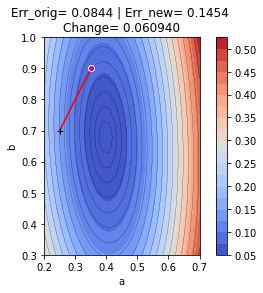

In [21]:
# this function plots the error landscape and adds a step from '+' to 'o' to the figure
plot_error_and_grad(a0=0.35, da=-0.1, b0=0.9, db=-0.2)

## Exercise
Use the interactive plot in the next cell. 

* Change the variables da and db. Observe how the new location changes and how the error changes.
    * Change da and db such that the error becomes as small as possible
    * How much did the error decrease?
* Look at the errors (color coded) around *the starting point*. 
    * Visually estimate the direction of "fastest change" of the error *at the starting point*?
    * Change the parameters da and db such that the new location lies along that direction. 
    * What is the minimal error along that direction?
    * Within the given range of values for da and db, move as far as possible along the same direction of "fastest change". What is the value of the error at the new location?
    
* Comment your observations.

In [22]:
interact(plot_error_and_grad, 
    a0=fixed(0.36),
    da=widgets.FloatSlider(min=-0.12, max=0.12, step=0.002, value=0.05),
    b0 = fixed(0.78),
    db = widgets.FloatSlider(min=-0.12, max=0.12, step=0.01, value=0.0),
    scaling = fixed(0.8),
    X=fixed(Data_X), Y=fixed(Data_Y), 
    a_min = fixed(0.3), a_max=fixed(0.55), b_min=fixed(0.3), b_max=fixed(0.9), nr_mesh_points_ab=fixed(25)
        )


interactive(children=(FloatSlider(value=0.05, description='da', max=0.12, min=-0.12, step=0.002), FloatSlider(…

<function __main__.plot_error_and_grad(a0, da, b0, db, scaling=1.0, X=array([-4. , -2. ,  1. ,  2.5,  3.9]), Y=array([-0.9 , -0.4 ,  1.7 ,  1.5 ,  2.05]), a_min=0.2, a_max=0.7, b_min=0.3, b_max=1.0, nr_mesh_points_ab=25)>

## Exercise
In the previous exercises, you have inspected the "error landscape" and visually identified the direction of "fastest change". Now we formalize this notion.

We previously defined the following error function:
$$
\begin{align}
E &= \frac{1}{2N}\sum_{i=1}^N e_i^2 \\
&= \frac{1}{2N}\sum_{i=1}^N (y_i - (a \cdot x_i + b))^2\\
\end{align}
$$

In mathematical optimization and in machine learning, error functions are often called *loss*. 

**Our goal is to minimize the loss by (iteratively) changing** $a$ **and** $b$. 


For the Gradient Descent algorithm, we need the direction (in the a, b plane) of the *fastest change* (change of the loss). This direction is given by the  vector of partial derivatives:

\begin{align}
    \textrm{Gradient of E} = \begin{bmatrix}
           \frac{\partial E}{\partial a} \\
           \frac{\partial E}{\partial b} \\
         \end{bmatrix}
  \end{align}

Q1. Fresh up your knowledge about gradients. ( For example here: https://en.wikipedia.org/wiki/Gradient)


Q2. Calculate these two partial derivatives.


In [23]:
# Here we use lambda expressions to implement the error gradient in python. Note the four parameters.

# We reuse the lambda expression lin_model defined at the beginning of this notebook.
# Numpy's subtract and multiply perform element-wise operations.
err_i = lambda X, Y, a, b : np.subtract(Y, lin_model(X, a, b))
dEda = lambda X, Y, a, b: (1.0 / len(X)) * np.sum(np.multiply(err_i(X, Y, a, b), -X))
dEdb = lambda X, Y, a, b: (1.0 / len(X)) * np.sum(np.multiply(err_i(X, Y, a, b), -1.))
gradE = lambda X, Y, a, b : [dEda(X, Y, a, b), dEdb(X, Y, a, b)]

We now use these expressions to evaluate the gradient at a given location and then update the parameters accordingly:

(1.401,
 0.9500000000000001,
 <Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a6d9100>)

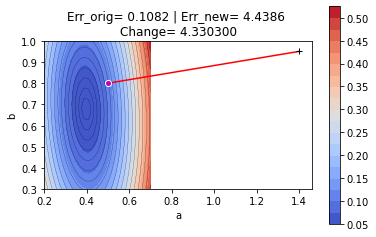

In [24]:
a = 0.5
b = 0.8
[da, db] = gradE(Data_X, Data_Y, a, b)
plot_error_and_grad(a, da, b, db)


The figure above shows two problems:

**1)** The step is too large. We need to scale it down. The optimal scaling factor depends on the problem at hand. The scaling factor is typically called ***learning rate***. Often the symbols $\alpha$, $\eta$ or $\epsilon$ are used.

(0.54505,
 0.8075,
 <Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a193550>)

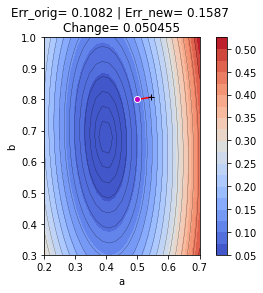

In [25]:
a = 0.5
b = 0.8
alpha = 0.05
[da, db] = gradE(Data_X, Data_Y, a, b)

plot_error_and_grad(a, da, b, db, alpha)

**2)** The loss is increasing, because we move in the wrong direction! The gradient points to the direction of fastest GROWTH. But we want to minimize the loss! We therefore need to make a step into the opposite direction. Remember, the method is called Gradient **Descent** !



(0.45494999999999997, 0.7925000000000001)

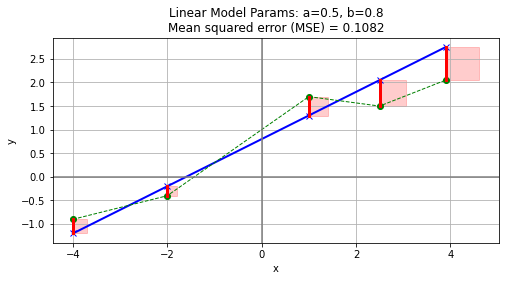

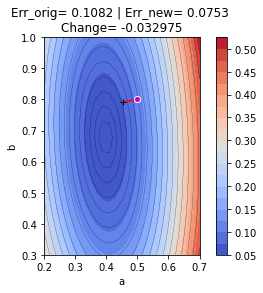

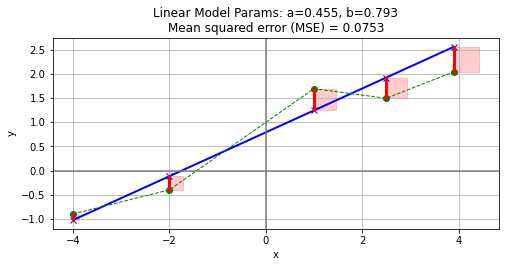

In [26]:
# We now use the correct parameters. Compare the three plots and make sure you understand them.
# Increase the learning rate from 0.05 to 0.15. What do you observe?

a0 = 0.5
b0 = 0.8
alpha = 0.05

plt_linear_model(a0, b0, Data_X, Data_Y, True)

[da, db] = gradE(Data_X, Data_Y, a0, b0)
# Note the minus sign here:
a1, b1, fig, ax = plot_error_and_grad(a0, -da, b0, -db, alpha)

plt_linear_model(a1, b1, Data_X, Data_Y, True)

## The Gradient Descent update rule

We can now formulate the update rule of the Gradient Descent method: <br>
At time step $t$ the parameter vector is $[a, b]_t$. At that location, the error gradient is evaluated (we use the vertical bar notation | ). The updated parameter vector  $[a, b]_{t+1}$ is obtained by making a small step in the opposite direction of the error gradient:

$$
\begin{align}
   \begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t+1} 
         =    \begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t} - \alpha 
         \begin{bmatrix}
           \frac{\partial E}{\partial a} \\
           \frac{\partial E}{\partial b} \\
         \end{bmatrix} \Big\rvert _{\begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t} }
  \end{align}
  \\
$$

The algorithm starts at some initial position $[a, b]_{t0}$. Then, the update rule is applied repeatedly. The number of update steps needed to come "close enough" to the minimum depends on the problem.

Next we implement the update rule and then visualize the behavior of the algorithm.


In [27]:
# Implements the gradient descent method
# Returns the final values of a and b and intermediate results (useful for visualization).
def grad_descent(a0, b0, X, Y, scaling, nr_iter):
    a = a0
    b = b0
    A = np.zeros(nr_iter+1)
    B = np.zeros(nr_iter+1)
    E = np.zeros(nr_iter+1)
    A[0] = a
    B[0] = b
    E[0] = sq_err(X, Y, a, b) # For visualization only.
    for i in range(nr_iter):
        [da, db] = gradE(X, Y, a, b)
        a -= scaling * da
        b -= scaling * db
        A[i+1] = a
        B[i+1] = b
        E[i+1] = sq_err(X, Y, a, b) # For visualization only. No need to calculate the error

    return a, b, A, B, E

## Exercise
Look at the example below. Make sure you understand the code and the visualization

* Try different learning rates alpha (eg. 0.001, 0.1, 0.2). 
* Try different numbers of iterations. 
* Try different (a0, b0)
* Comment your observations
* Think about different stopping criteria.

(0.4007655849227476, 0.6018958773657956)

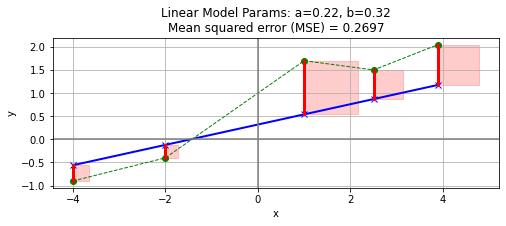

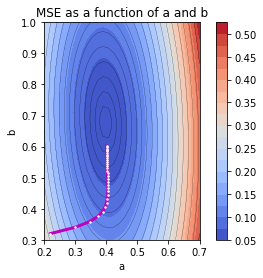

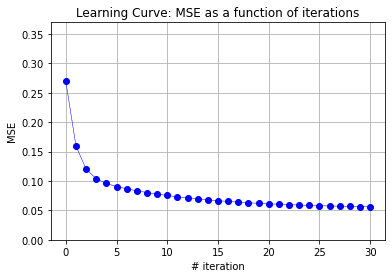

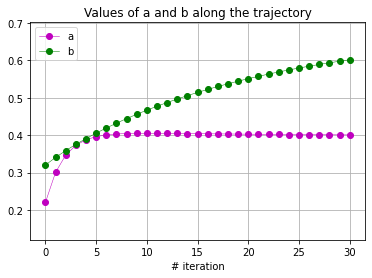

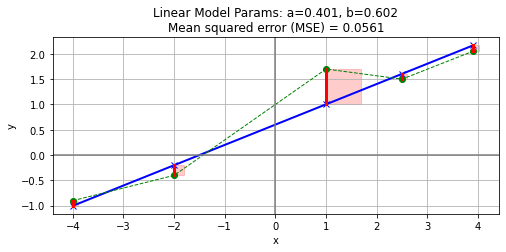

In [28]:

# set the learning rate alpha and the number of iterations
alpha = 0.05
n_iter = 30

# set the initial value [a,b]_t0:
a0 = 0.22
b0 = 0.32

# visualize the initial model
plt_linear_model(a0, b0, Data_X, Data_Y, True)

# call the algorithm and then use the return values to visualize the iterations.
a, b, A, B, E = grad_descent(a0, b0, Data_X, Data_Y, alpha, n_iter)
    
# visualize the progression of the gradient descent
fig, ax = plot_error()
ax.plot(A,B, '-m', linewidth =3)
ax.plot(A,B, '.w', markersize=3)

plt.figure()
plt.plot(E, '-ob',linewidth =0.5, markersize=6)
plt.ylim([0, np.max(E)+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.ylabel('MSE')
plt.title('Learning Curve: MSE as a function of iterations')

plt.figure()
plt.plot(A, '-om',linewidth =0.5, label="a")
plt.plot(B, '-og',linewidth =0.5, label="b")
plt.ylim([np.min([A,B])-0.1, np.max([A,B])+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.title('Values of a and b along the trajectory')
plt.legend()


plt_linear_model(a, b, Data_X, Data_Y, True)


## Exercise
Look at the loss function plotted below. It is a constructed example. Imagine the figure showed the error-landscape of a two-parameter-model fitted to some data.

* What problem do you identify, when applying Gradient Descent?
* Discuss the problem and a potential solution.

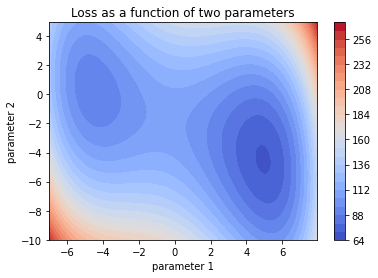

In [29]:
p1 = np.arange(-7, 8, 0.05)
p2 = np.arange(-10, 5, 0.05)
p1m, p2m = np.meshgrid(p1, p2, sparse=True)
z =  0.05*p1m**4 -2*p1m**2 + p1m*p2m + 4*p2m + p2m**2 + 110
h = plt.contourf(p1,p2,z, levels=30, cmap=cm.coolwarm)
plt.colorbar(h)
plt.xlabel('parameter 1')
plt.ylabel('parameter 2')
plt.title("Loss as a function of two parameters")
plt.show()

# (Almost) Done!
Congratulations! You have now a solid understanding of the **Gradient Descent** method.

But what is ***Stochastic*** **Gradient Descent**?

# Stochastic Gradient Descent (SGD)

In the example above, we were given $N=5$ data points. When evaluating the gradient of the loss function, we were taking into account all those five points. Imagine we were given $N=1'000$ points. Then, at each iteration, we would have to iterate over all $N=1'000$ points to calculate the gradient of the loss function. 

**The idea behind Stochastic Gradient Descent (SGD) is that we do not need the *exact* gradient to find a trajectory toward the minimum. Instead, at each iteration we can randomly pick a few datapoints and use them to calculate an approximation of the gradient.**

In the following equations, we use the symbol $J_n$ to denote a set of $n$ 'randomly' chosen indices, and the subscript j for the indices. 


$$
\begin{align}
\textrm{E} &= \frac{1}{2N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b))^2 \\
\frac{\partial \textrm{E}}{\partial a} &= \frac{1}{N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b)) (-x_i) \\
&\approx \frac{1}{n} \sum_{j \in J_n} (y_j - (a \cdot x_j + b)) (-x_j)  \\
\frac{\partial \textrm{E}}{\partial b} &= \frac{1}{N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b)) (-1) \\
&\approx \frac{1}{n} \sum_{j \in J_n}^n (y_{j} - (a \cdot x_{j} + b)) (-1)  \\
\end{align}
$$




We now visualize the error landscape for three different subsets (each of size $n=3$) of the given data. Note that we add the same point (a0, b0) to each of the three figures and show the respecitve gradients.




(0.41983333333333334,
 0.535,
 <Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b2d8a00>)

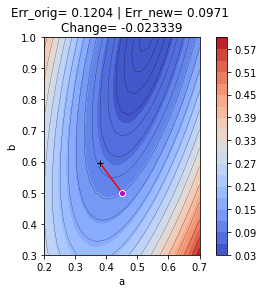

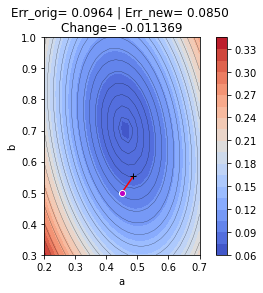

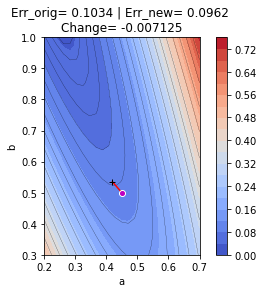

In [30]:
a0 = 0.45
b0 = 0.5

alpha = 0.25  # we chose a large value to emphasize the effect in the figures below

J = [0, 1, 2]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])

J = [1, 2, 3]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])

J = [2, 3, 4]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])


## Exercise

* Before running the following code block, describe how the error-landscape looks like, if we use only a **single** data point?

(0.37005,
 0.4795,
 <Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b1a5af0>)

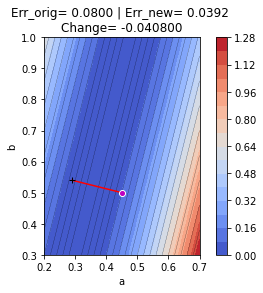

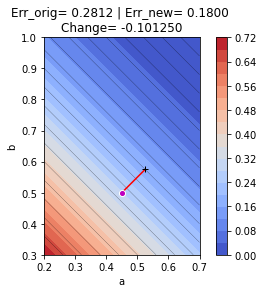

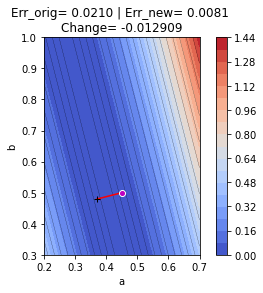

In [31]:
a0 = 0.45
b0 = 0.5
alpha = 0.1

J = [0]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])

J = [2]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])

J = [4]
[da, db] = gradE(Data_X[J], Data_Y[J], a0, b0)
plot_error_and_grad(a0, -da, b0, -db, alpha, Data_X[J], Data_Y[J])



The number $n$ (nr of samples, used to approximate the gradient) is called **batch size**. For the case of $n=1$ we get the following equations. 

$$
\begin{align}
\textrm{E} &= \frac{1}{2N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b))^2 \\[20pt]
\frac{\partial \textrm{E}}{\partial a} &= \frac{1}{N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b)) (-x_i) \\
&\approx \frac{1}{n} \sum_{j \in J_n} (y_j - (a \cdot x_j + b)) (-x_j)  \\
\frac{\partial E_j}{\partial a} &= (y_j - (a \cdot x_j + b)) (-x_j) \\[20pt] 
\frac{\partial \textrm{E}}{\partial b} &= \frac{1}{N} \sum_{i=1}^{N} (y_i - (a \cdot x_i + b)) (-1) \\
&\approx \frac{1}{n} \sum_{j \in J_n}^n (y_{j} - (a \cdot x_{j} + b)) (-1)  \\
\frac{\partial E_j}{\partial b} &= (y_{j} - (a \cdot x_{j} + b)) (-1)
\end{align}
$$




Approximating the gradient based on a single sample only is not accurate at all (look at the previous figures). But we can compensate for that: By reducing the step-size (learning rate), the effect of each single error will be reduced. On average, over many steps, the algorithm still moves toward the minimum.



## The SGD Algorithm:

Stochastic Gradient Descent implements the following update rule:

$$
\begin{align}
   \begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t+1} 
         =    \begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t} - \alpha 
         \begin{bmatrix}
           \frac{\partial E_j}{\partial a} \\
           \frac{\partial E_j}{\partial b} \\
         \end{bmatrix} \Big\rvert _{\begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}_{t} }
  \end{align}
  \\
$$

Unlike Gradient Descent, SGD does not use the true gradient but an approximation using a single datum ($n=1$). 

A common variant of SGD is using so called mini-batches ($1<n<N$). Increasing the batch-size will reduce the variance of the gradient estimation (allowing for larger step-size).

In the implementation below we provide a batch size parameter and you should vary it to observe the effect.

In [32]:
# Implements the stochastic gradient descent method
# Returns the final values of a and b and intermediate results (useful for visualization).
def stochastic_grad_descent(a0, b0, X, Y, scaling, n, nr_iter):
    # we now need a random number generator to pick n random indices
    rand_gen = np.random.default_rng()
    N = len(X)
    a = a0
    b = b0
    A = np.zeros(nr_iter+1)
    B = np.zeros(nr_iter+1)
    E = np.zeros(nr_iter+1)
    A[0] = a
    B[0] = b
    E[0] = sq_err(X, Y, a, b) # For visualization only.
    for i in range(nr_iter):
        # at each iteration, sample n points:
        J = rand_gen.choice(N, size=n, replace=False)
        Xn = Data_X[J]
        Yn = Data_Y[J]
        [da, db] = gradE(Xn, Yn, a, b)
        a -= scaling * da
        b -= scaling * db
        A[i+1] = a
        B[i+1] = b
        E[i+1] = sq_err(X, Y, a, b) # For visualization only.

    return a, b, A, B, E

## Exercise

Look at the example below. Make sure you understand the code and the visualization

* Try different batch-sizes
* Try different learning rates
* Change the number of iterations
* Does SDG differ from Gradient Descent for batch-size = 5 (generally, $n=N$)?
* Set $\alpha=0.02$, $a_0=0.22$, $b_0=0.32$, batch-size$=1$, $n_{iter}=1'000$. Does SGD converge?
* Set $\alpha=0.002$, $a_0=0.22$, $b_0=0.32$, batch-size$=1$, $n_{iter}=10'000$. Does SGD converge?
* Can you think of a modification of the algorithm that leads to convergence?
* Set $\alpha=0.0001$, $a_0=0.22$, $b_0=0.32$, batch-size$=1$, $n_{iter}=50'000$. How does the trajectory differ from the one of (non-stochastic) Gradient Descent?


(0.3992705631624643, 0.6737270679468923)

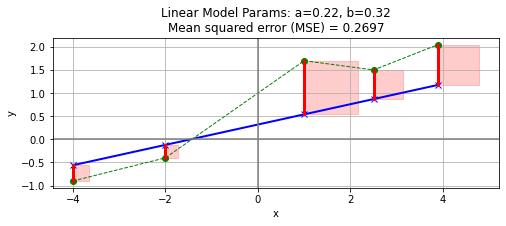

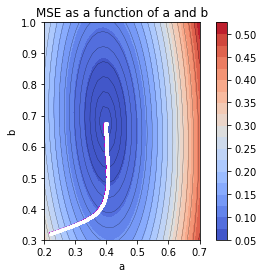

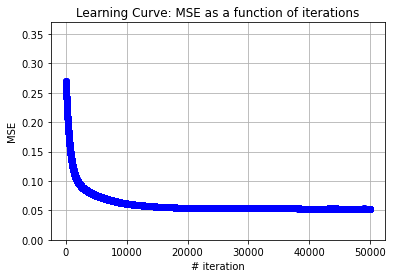

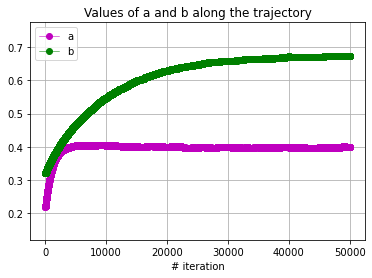

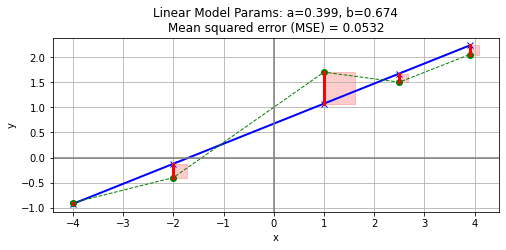

In [33]:

# set the learning rate alpha and the number of iterations
alpha = 0.0001
n_iter = 50000

# set the number of samples used to approximate the gradient (aka batch size)
batch_size = 1

# set the initial value [a,b]_t0:
a0 = 0.22
b0 = 0.32
# a0 = 0.4
# b0 = 0.7

# visualize the initial model:
plt_linear_model(a0, b0, Data_X, Data_Y, True)

# call the algorithm and then use the return values to visualize the iterations.
a, b, A, B, E = stochastic_grad_descent(a0, b0, Data_X, Data_Y, alpha, batch_size, n_iter)
    
# visualize the progression of the gradient descent
fig, ax = plot_error()
ax.plot(A,B, '-m', linewidth =3)
ax.plot(A,B, '.w', markersize=3)

plt.figure()
plt.plot(E, '-ob',linewidth =0.5, markersize=6)
plt.ylim([0, np.max(E)+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.ylabel('MSE')
plt.title('Learning Curve: MSE as a function of iterations')

plt.figure()
plt.plot(A, '-om',linewidth =0.5, label="a")
plt.plot(B, '-og',linewidth =0.5, label="b")
plt.ylim([np.min([A,B])-0.1, np.max([A,B])+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.title('Values of a and b along the trajectory')
plt.legend()


plt_linear_model(a, b, Data_X, Data_Y, True)



## Stochastic Gradient Descent with annealed learning rate

We have seen that, for a fixed learning rate $\alpha$, SGD does not converge. Instead, the algorithm keeps fluctuating around the minimum. One can set $\alpha$ to a very small value, in which case the fluctuations are smaller and SGD stays 'close enough' to the minimum during the 'late iterations'. Therefore, in order to obtain a result of high accuracy, one would choose a very **small** $\alpha$.


During the 'early iterations', the situation is different: There is no benefit staying close to the optimal trajectory (compare with exercise above, where you set $\alpha=0.0001$). As long as SGD moves roughly in the direction toward the minimum, fluctuations (even relatively large ones) around the 'optimal' trajectory are acceptable. One would therefore choose a **large** $\alpha$ in order to improve the speed of the algorithm.


**Annealing solves this appearent contradiction by adapting the learning rate. It starts with a large $\alpha$ and reduces it over time.** There are many options how one can reduce the learning rate over time. Here we decay the learning rate by multiplying it at each iteration by a decay_factor.


In [34]:
# Implements the stochastic gradient descent method with annealing
# Returns the final values of a and b and intermediate results (useful for visualization).
def annealed_stochastic_grad_descent(a0, b0, X, Y, scaling, n, nr_iter, annealing_factor = 0.99, lower_bound = 1e-4):
    # we now need a random number generator to pick n random indices
    rand_gen = np.random.default_rng()
    N = len(X)
    a = a0
    b = b0
    A = np.zeros(nr_iter+1)
    B = np.zeros(nr_iter+1)
    E = np.zeros(nr_iter+1)
    S = np.zeros(nr_iter+1)
    A[0] = a
    B[0] = b
    E[0] = sq_err(X, Y, a, b) # For visualization only.
    S[0] = scaling
    for i in range(nr_iter):
        # at each iteration, sample n points:
        J = rand_gen.choice(N, size=n, replace=False)
        Xn = Data_X[J]
        Yn = Data_Y[J]
        [da, db] = gradE(Xn, Yn, a, b)
        a -= scaling * da
        b -= scaling * db
        scaling = np.max([scaling*annealing_factor, lower_bound])
        A[i+1] = a
        B[i+1] = b
        E[i+1] = sq_err(X, Y, a, b) # For visualization only.
        S[i+1] = scaling

    return a, b, A, B, E, S

(0.39706355370686724, 0.6698468671869486)

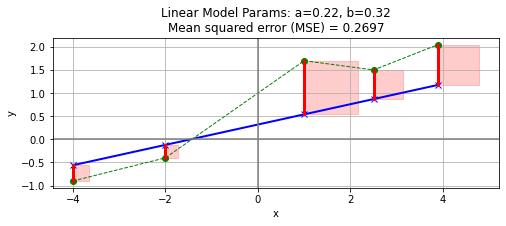

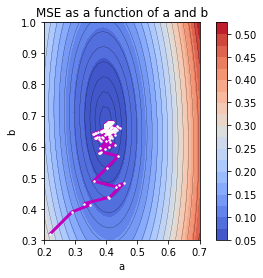

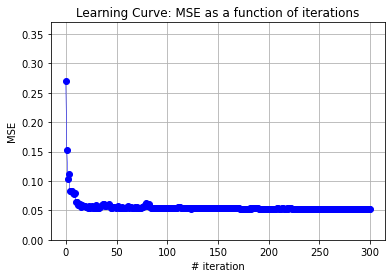

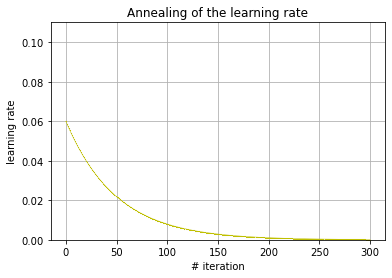

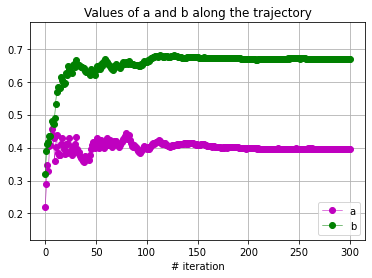

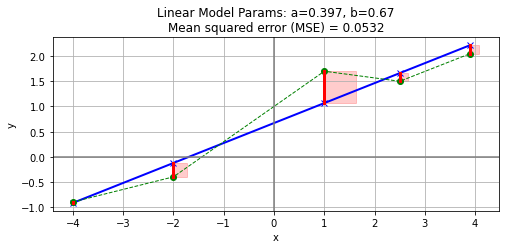

In [35]:

# set the learning rate alpha and the number of iterations
alpha = 0.06
n_iter = 300

# set the number of samples used to approximate the gradient (aka batch size)
batch_size = 1

# set the initial value [a,b]_t0:
a0 = 0.22
b0 = 0.32

# parameters of the learning rate annealing
annealing_factor = 0.98
lower_bound = 1e-4

# visualize the initial model:
plt_linear_model(a0, b0, Data_X, Data_Y, True)

# call the algorithm and then use the return values to visualize the iterations.
a, b, A, B, E, S = annealed_stochastic_grad_descent(a0, b0, Data_X, Data_Y, 
                                                    alpha, batch_size, n_iter, 
                                                    annealing_factor, lower_bound)
    
# visualize the progression of the gradient descent
fig, ax = plot_error()
ax.plot(A,B, '-m', linewidth =3)
ax.plot(A,B, '.w', markersize=3)

plt.figure()
plt.plot(E, '-ob',linewidth =0.5, markersize=6)
plt.ylim([0, np.max(E)+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.ylabel('MSE')
plt.title('Learning Curve: MSE as a function of iterations')


plt.figure()
plt.plot(S, '-xy',linewidth =0.5, markersize=0.5)
plt.ylim([0, np.max(S)+0.05])
plt.grid()
plt.xlabel('# iteration')
plt.ylabel('learning rate')
plt.title('Annealing of the learning rate')

plt.figure()
plt.plot(A, '-om',linewidth =0.5, label="a")
plt.plot(B, '-og',linewidth =0.5, label="b")
plt.ylim([np.min([A,B])-0.1, np.max([A,B])+0.1])
plt.grid()
plt.xlabel('# iteration')
plt.title('Values of a and b along the trajectory')
plt.legend()


plt_linear_model(a, b, Data_X, Data_Y, True)



Todo: conclusion.
    link to regression
    link to NNs

Rewrite

We now see two reason, why we have to chose a small value for the learning rate $\alpha$. First, as seen in the first part, we need to scale down the magnitude of the gradient to match the scale of the parameter values. Second, by chosing a small $\alpha$ we also reduce the effect of errors introduced by the approximation.

This shows a computational compromise: for small $n$, we can speed up the calculation of the approximate gradient. On the other hand, we need more (but smaller) steps to compensate for the approximation error.